In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('RV_dataset.csv', index_col=0)
df.head()

,.SPX,.GDAXI,.FCHI,.FTSE,.OMXSPI,.N225,.KS11,.HSI
0,0.005256,0.005322,0.005244,0.004577,0.005303,0.006352,0.004162,0.003382
1,0.005144,0.004198,0.004752,0.003604,0.004506,0.005755,0.004880,0.003169
2,0.004797,0.004633,0.005409,0.005985,0.005042,0.005430,0.005316,0.004018
3,0.005760,0.007076,0.007345,0.005245,0.005927,0.008043,0.006044,0.005876
4,0.005093,0.005453,0.005685,0.005473,0.005393,0.008035,0.004904,0.005339


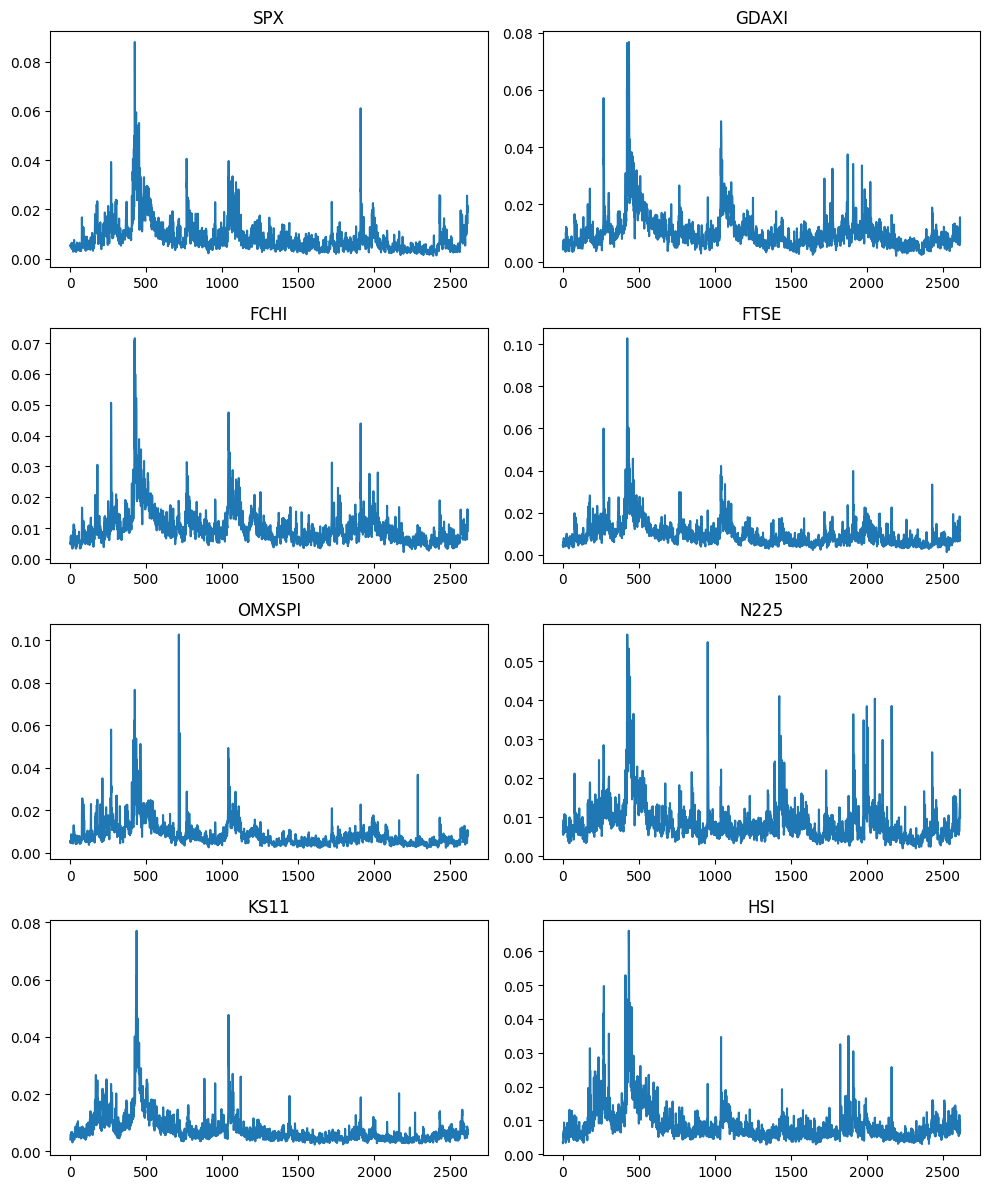

In [3]:

num_cols = 2
num_rows = math.ceil(len(df.columns) / num_cols) 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, num_rows * 3))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    axes[i].plot(df.index, df[col], linestyle='-')
    axes[i].set_title(col[1:])  

for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [4]:
window_size = 60
df_m = pd.DataFrame();
for col in df.columns:
    df_m[f'{col}_mean'] = df[col].rolling(window=window_size).mean()
    df_m[f'{col}_volatility'] = df[col].rolling(window=window_size).std()

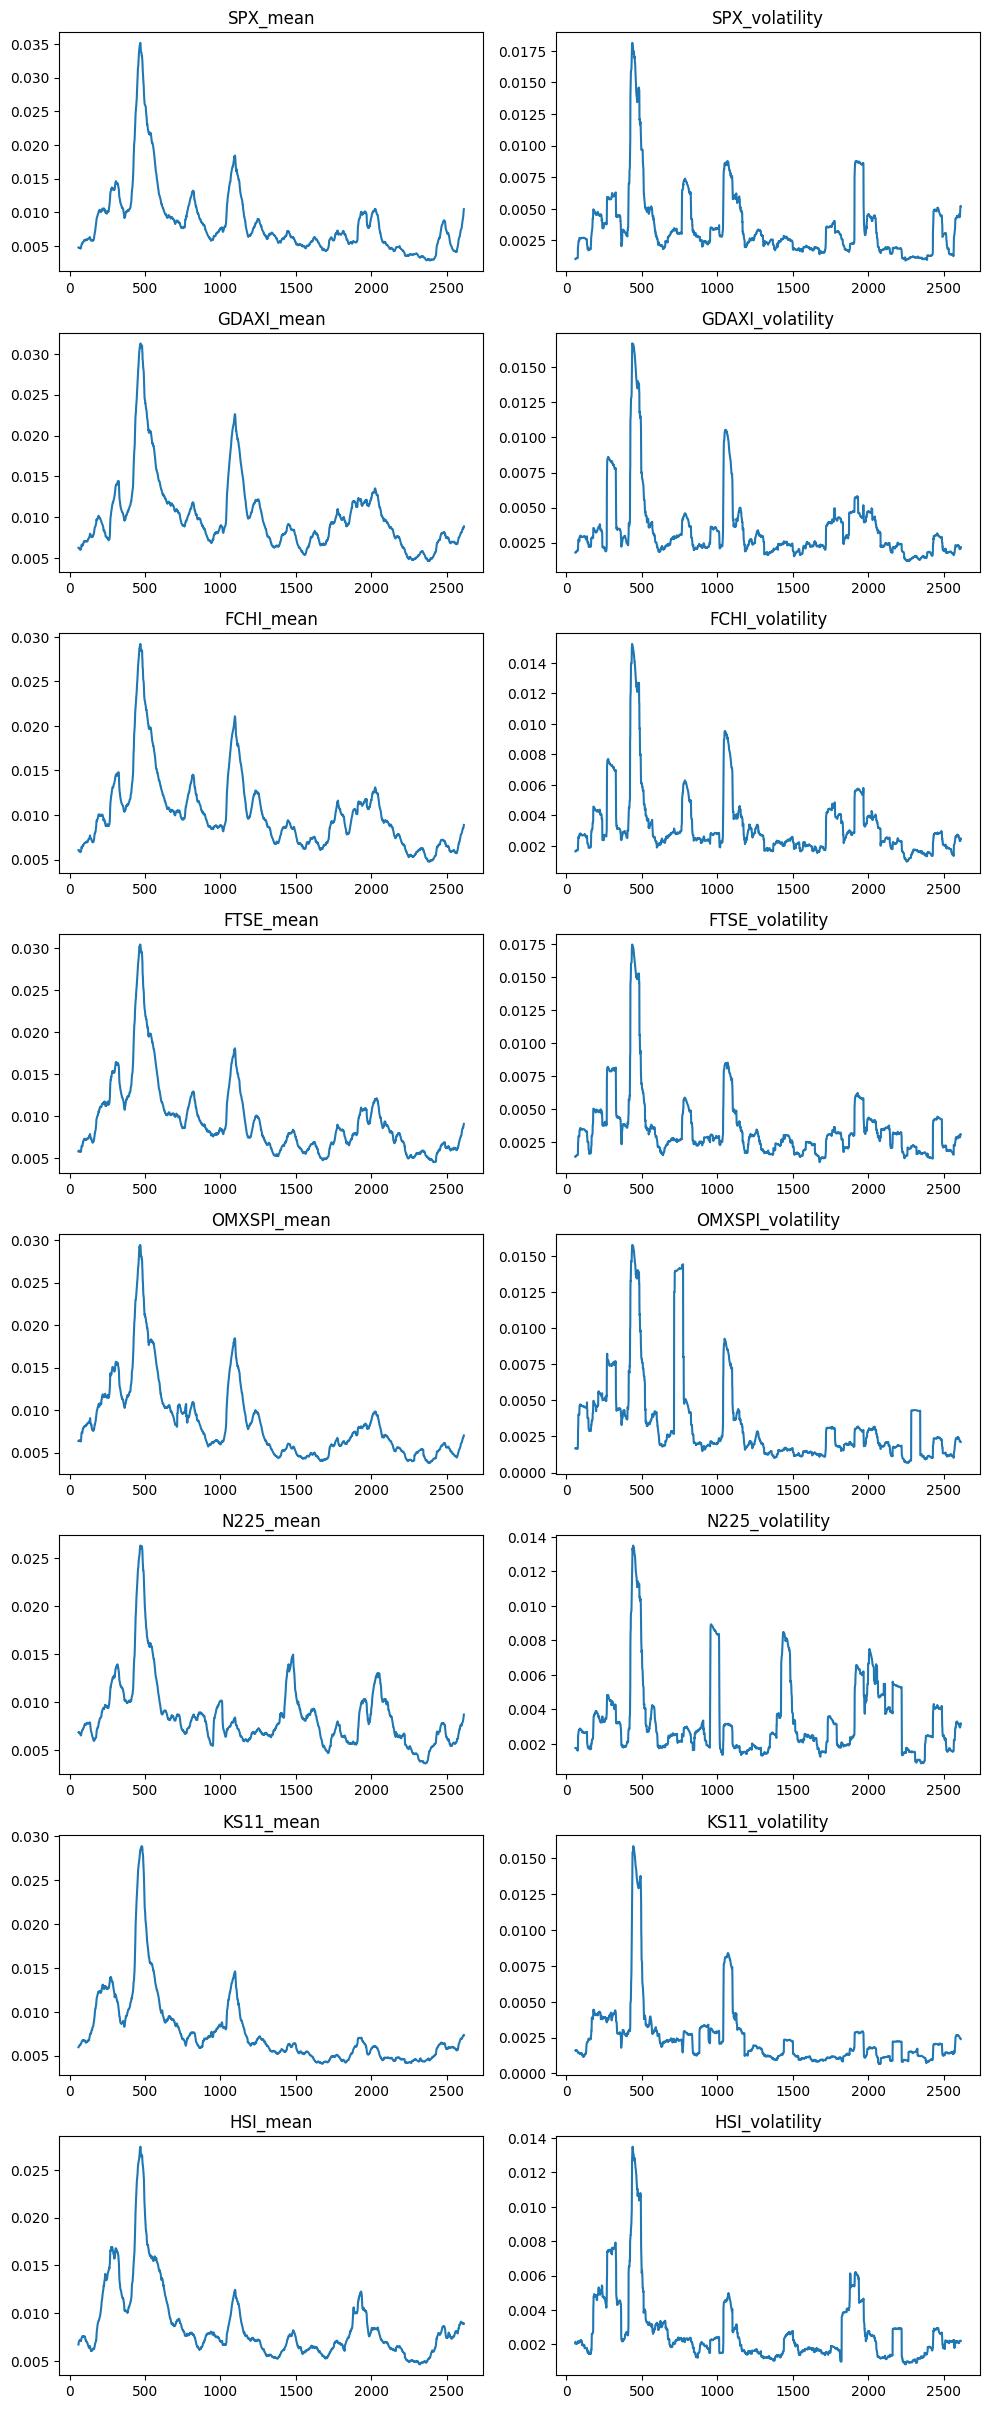

In [5]:
num_cols = 2
num_rows = len(df_m.columns)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, num_rows * 3))

axes = axes.flatten()

for i, col in enumerate(df_m.columns):
    axes[i].plot(df_m.index, df_m[col], linestyle='-')
    axes[i].set_title(col[1:])  

for i in range(len(df_m.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import scipy.stats as stats
for col in df.columns:
    series = df[col]
    plt.figure(figsize=(8, 5))
    sns.histplot(series, kde=True, bins=30)
    plt.title("Histogram of Price")
    plt.show()

    # Q-Q Plot (Quantile-Quantile Plot)
    plt.figure(figsize=(6, 6))
    stats.probplot(series, dist="norm", plot=plt)
    plt.title("Q-Q Plot")
    plt.show()


Date
06/28/2022         NaN
06/27/2022   -0.003464
06/24/2022   -0.005166
06/23/2022   -0.015792
06/22/2022    0.017784
                ...   
10/30/2006   -0.001713
10/27/2006    0.000695
10/26/2006    0.003451
10/25/2006   -0.003071
10/24/2006   -0.002781
Name: Log_Return, Length: 3981, dtype: float64


<Figure size 800x500 with 0 Axes>

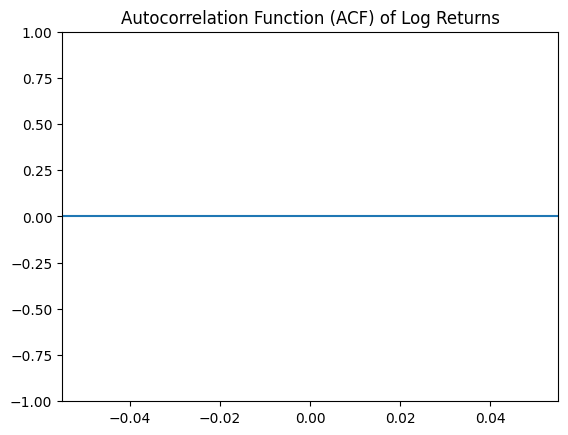

<Figure size 800x500 with 0 Axes>

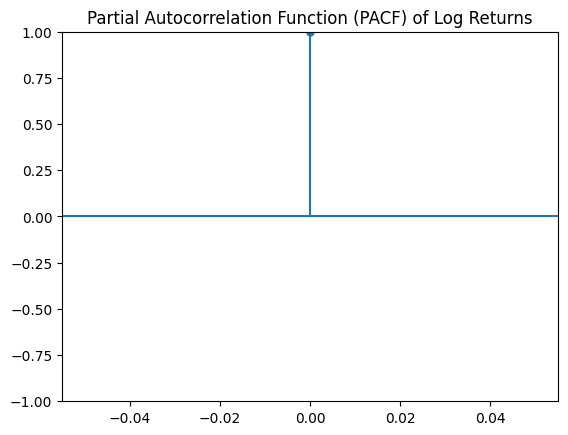

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
ticker = 'GDAXI'
df_p = pd.read_csv("global index etf return/"+ticker+'.csv', index_col=0) 
#df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")
df_p['Price'] = df_p['Price'].str.replace(',', '').astype(float)
df_p['return'] = df_p['Price'].pct_change().dropna() * 100
df_p['Log_Return'] = np.log(df_p['Price'] / df_p['Price'].shift(1))
print(df_p['Log_Return'])
plt.figure(figsize=(8, 5))
plot_acf(df_p['Log_Return'], lags=30)  # Adjust lags as needed
plt.title("Autocorrelation Function (ACF) of Log Returns")
plt.show()
plt.figure(figsize=(8, 5))
plot_pacf(df_p['Log_Return'], lags=30, method='ywm')  # 'ywm' method for stable results
plt.title("Partial Autocorrelation Function (PACF) of Log Returns")
plt.show()
# # Plot
# fig, ax = plt.subplots(figsize=(16,8))
# ax.plot(df['return'], color='lightcoral')
# ax.set(title='df', ylabel='% Return') 
# plt.show()

In [9]:
df

,.SPX,.GDAXI,.FCHI,.FTSE,.OMXSPI,.N225,.KS11,.HSI
0,0.005256,0.005322,0.005244,0.004577,0.005303,0.006352,0.004162,0.003382
1,0.005144,0.004198,0.004752,0.003604,0.004506,0.005755,0.004880,0.003169
2,0.004797,0.004633,0.005409,0.005985,0.005042,0.005430,0.005316,0.004018
3,0.005760,0.007076,0.007345,0.005245,0.005927,0.008043,0.006044,0.005876
4,0.005093,0.005453,0.005685,0.005473,0.005393,0.008035,0.004904,0.005339
...,...,...,...,...,...,...,...,...
2610,0.025572,0.005730,0.006339,0.006344,0.004497,0.011640,0.004730,0.006029
2611,0.020047,0.009404,0.009021,0.018137,0.006934,0.012335,0.008711,0.010021
2612,0.018774,0.010436,0.012341,0.010974,0.008181,0.013101,0.006062,0.008755
2613,0.021550,0.015518,0.016118,0.010953,0.010663,0.017026,0.007810,0.008388


In [18]:
tickers = df.columns
tickers =  [s.lstrip('.') for s in tickers]
tickers

['SPX', 'GDAXI', 'FCHI', 'FTSE', 'OMXSPI', 'N225', 'KS11', 'HSI']

In [42]:
corr = pd.DataFrame()
for ticker in tickers:
    rv = df['.'+ticker]
    
    d_p = pd.read_csv("global index etf return/"+ticker+'.csv', index_col=0) 
    d_p['Price'] = d_p['Price'].str.replace(',', '').astype(float)
    d_p['Log_Return'] = np.log(df_p['Price'] / d_p['Price'].shift(1))
    log_return = d_p['Log_Return'].dropna()
    
    df_new = pd.DataFrame()
    log_return = log_return.to_frame()
    log_return.index = pd.to_datetime(log_return.index)
    log_return['Date_Int'] = (log_return.index.max() -log_return.index).days  # Convert date index to int

    log_return.set_index('Date_Int', inplace=True)
    # df_new['RV'] = rv
    # df_new['log_return'] = log_return
    
    #df_new = df_new[['RV', 'log_return']].dropna().sort_index()
    common_dates = rv.index.intersection(log_return.index)
    rv = rv.loc[common_dates]
    log_return = log_return.loc[common_dates]
    # print(rv)
    # print(log_return)
    df_new['RV'] = rv
    df_new['log_return'] = log_return
    correlation = df_new['RV'].corr(df_new['log_return'])
    corr[ticker] = [correlation]
    print(f'{ticker}:Pearson Correlation: {correlation:.4f}')

SPX:Pearson Correlation: -0.3386
GDAXI:Pearson Correlation: -0.0353
FCHI:Pearson Correlation: 0.2120
FTSE:Pearson Correlation: 0.3975
OMXSPI:Pearson Correlation: -0.4292
N225:Pearson Correlation: -0.2558
KS11:Pearson Correlation: -0.1670
HSI:Pearson Correlation: 0.2491


In [43]:
corr

,SPX,GDAXI,FCHI,FTSE,OMXSPI,N225,KS11,HSI
0,-0.338604,-0.035292,0.211963,0.397545,-0.429171,-0.255845,-0.166977,0.249114
